# Time series and forecasting

Let's say you have a series of numbers and wish to forecast it;

In [2]:
raw = c(34, 62, 211, 200, 124, 26, 131, 64, 46, 161, 225, 248, 192, 169, 57, 57, 209, 266, 214, 167, 217, 50, 78, 155, 252, 200, 249, 204, 99, 78, 307, 188, 168, 278, 272, 144, 50, 278, 223, 138, 167, 341, 99, 54, 374, 176, 257, 248, 252, 98, 236, 291, 282, 346, 293, 203, 150, 75, 372, 246, 331, 483, 284, 33, 76, 297, 440, 418, 338, 333, 190, 182, 441, 469, 489, 402, 409, 148, 90, 285, 260, 278, 425, 280, 155, 176, 414, 518, 434, 520, 430, 110, 104, 289, 409, 297, 315, 175, 91, 60, 247, 339, 315, 243, 236, 64, 61, 171, 199, 214, 196, 256, 58, 80, 278, 290, 309, 224, 168, 25, 64, 267, 292, 311, 334, 186, 78, 30, 188, 289, 169, 210, 159, 38, 24, 167, 141, 185, 236, 93, 42, 31, 187, 182, 185, 142, 94, 58, 85, 134, 226, 262, 156, 164, 106, 0, 147, 173, 110, 136, 147, 29, 17, 98, 30, 66, 88, 39, 0, 15, 65, 58)

A basic plot of the data looks like the following

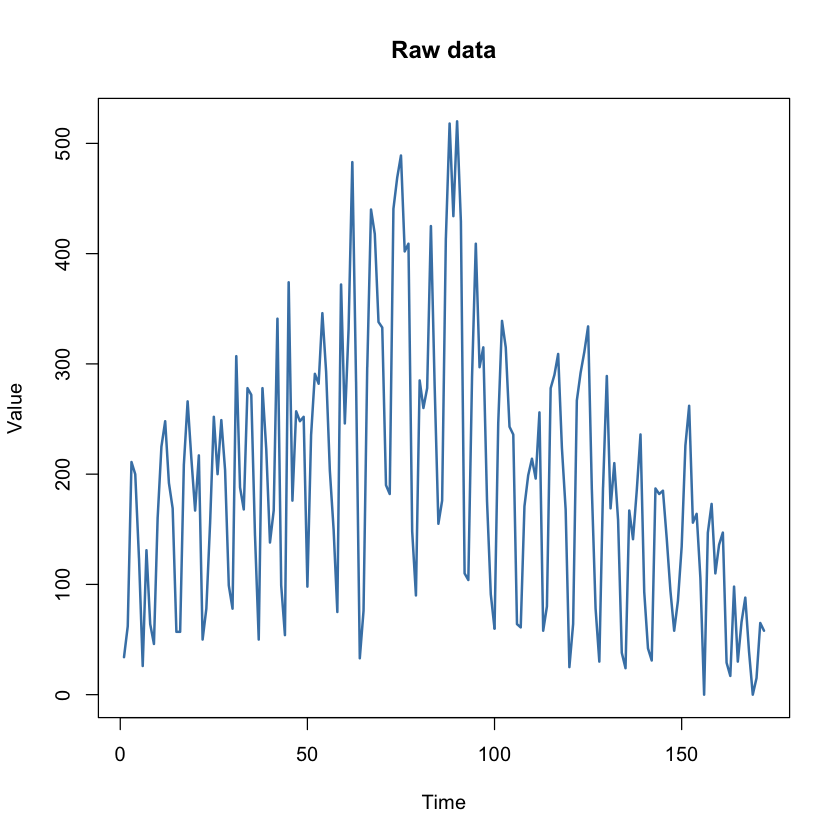

In [14]:
plot(raw, main="Raw data", t="l", xlab="Time", ylab="Value", col="#4682B4", lwd=2)

The precise time axis is at this point not relevant and if you create a time series object (using the `ts` command) out of this raw data

In [75]:
rawSeries = ts(raw)

you get an object with frequency one and an abstract or indexed time axis;

In [76]:
rawSeries

Time Series:
Start = 1 
End = 172 
Frequency = 1 
  [1]  34  62 211 200 124  26 131  64  46 161 225 248 192 169  57  57 209 266
 [19] 214 167 217  50  78 155 252 200 249 204  99  78 307 188 168 278 272 144
 [37]  50 278 223 138 167 341  99  54 374 176 257 248 252  98 236 291 282 346
 [55] 293 203 150  75 372 246 331 483 284  33  76 297 440 418 338 333 190 182
 [73] 441 469 489 402 409 148  90 285 260 278 425 280 155 176 414 518 434 520
 [91] 430 110 104 289 409 297 315 175  91  60 247 339 315 243 236  64  61 171
[109] 199 214 196 256  58  80 278 290 309 224 168  25  64 267 292 311 334 186
[127]  78  30 188 289 169 210 159  38  24 167 141 185 236  93  42  31 187 182
[145] 185 142  94  58  85 134 226 262 156 164 106   0 147 173 110 136 147  29
[163]  17  98  30  66  88  39   0  15  65  58

The time series command does not automatically detect any cycles or frequencies, so if you ask for it you get

In [58]:
cycle(rawSeries)
frequency(rawSeries)

Time Series:
Start = 1 
End = 172 
Frequency = 1 
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1

All the 1's say that all the numbers belong to the same cycle and frequency equal to one is essentially the same statement. From the plot one can see however that there is a rithm and if you wish to have a suggestion for it you do so using the `findFrequency` command from the `forecast` package

In [71]:
library(forecast) # if not installed use install.packages("forecast")
findfrequency(rawSeries)

[1] 7

So, we better adjust the time series with this finding

In [37]:
series = ts(raw, frequency = 7)

and now the series correctly says that there are 25 cycles of frequency 7 and the last one has a truncated one of only 4 items;

In [38]:
series

Time Series:
Start = c(1, 1) 
End = c(25, 4) 
Frequency = 7 
  [1]  34  62 211 200 124  26 131  64  46 161 225 248 192 169  57  57 209 266
 [19] 214 167 217  50  78 155 252 200 249 204  99  78 307 188 168 278 272 144
 [37]  50 278 223 138 167 341  99  54 374 176 257 248 252  98 236 291 282 346
 [55] 293 203 150  75 372 246 331 483 284  33  76 297 440 418 338 333 190 182
 [73] 441 469 489 402 409 148  90 285 260 278 425 280 155 176 414 518 434 520
 [91] 430 110 104 289 409 297 315 175  91  60 247 339 315 243 236  64  61 171
[109] 199 214 196 256  58  80 278 290 309 224 168  25  64 267 292 311 334 186
[127]  78  30 188 289 169 210 159  38  24 167 141 185 236  93  42  31 187 182
[145] 185 142  94  58  85 134 226 262 156 164 106   0 147 173 110 136 147  29
[163]  17  98  30  66  88  39   0  15  65  58

which can also be seen in the cycle information

In [39]:
cycle(series)

Time Series:
Start = c(1, 1) 
End = c(25, 4) 
Frequency = 7 
  [1] 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2
 [38] 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4
 [75] 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6
[112] 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1
[149] 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4

Another way to detect cycles is by means of Fourier decomposion. This, in a nutshell, is based on the fact that any continuous function can be decomposed in sines and cosines of increasing frequencies. The intensity or scale of these  sines/cosines then gives an indication of the data's underlying rithm. The plot generated by `spectrum` uses internally a log which hides the peaks, you can get rid of this like so

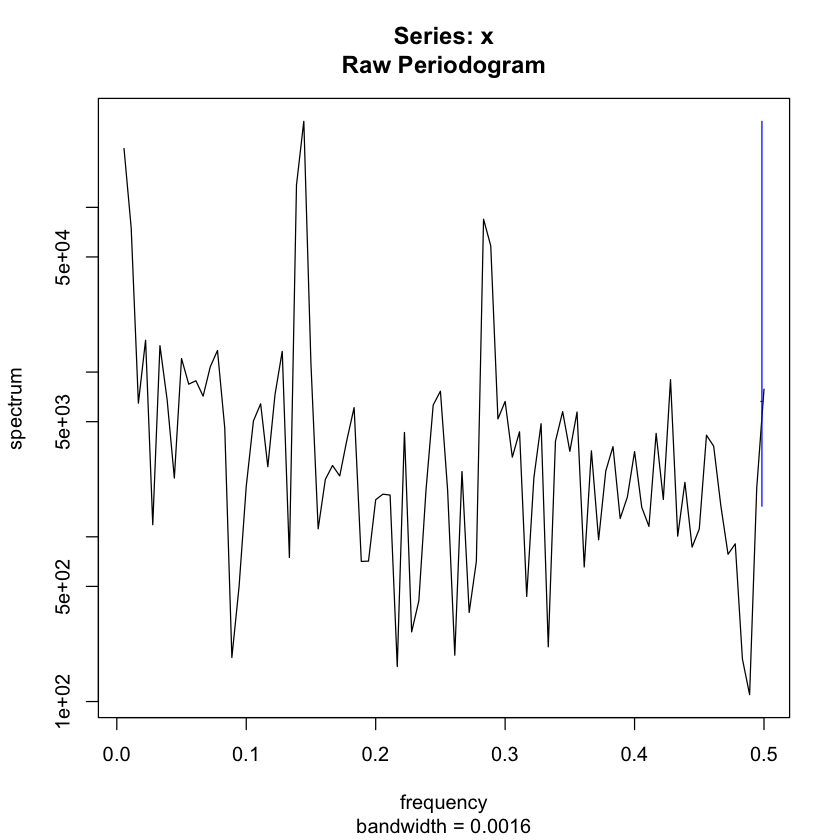

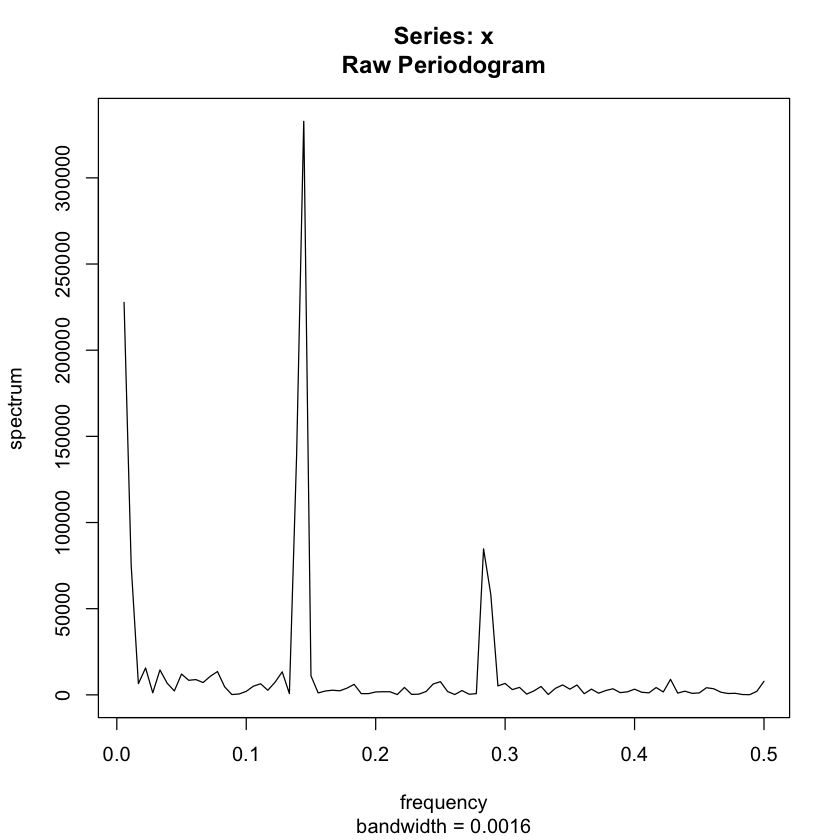

In [112]:
spec = spectrum(rawSeries)
plot(spec, log=c("no"))

and if you wish to get the prominent frequency out of this you need to read the documentation of the `spectrum` function which tells you that the axis is scaled with 1/frequency turning the spectrum in the interval [-frequency/2, +frequency/2]. So, we get the main frequency by means of

In [113]:
floor(1/spec$freq[which.max(spec$spec)] + 0.5)

[1] 7

thus giving seven days as should be.

Now, time series data is sometimes too noisy or too varying to extract e.g. a trend from. A way to make time series more smooth is by means of averaging the data. Technically this is called a **simple moving average** or SMA. One simply takes the average of some data point within a predefined time window (amount of points being averaged). The procedure has as a side-effect that some points are sacrificed and the larger the averaging window the more it reduced the time series. As an extreme case, a window equal in size to the length of the series would reduce the series to one point.

Mathemaically speaking, the SMA with window of size N is a map from the original series $\{x_i\}$ to $\{s_i\}$ via

$$
s_n = \frac{x_{n-1} + \dots + x_{n-N}}{N}
$$

and upon applying this to our series (with window size 7) we get

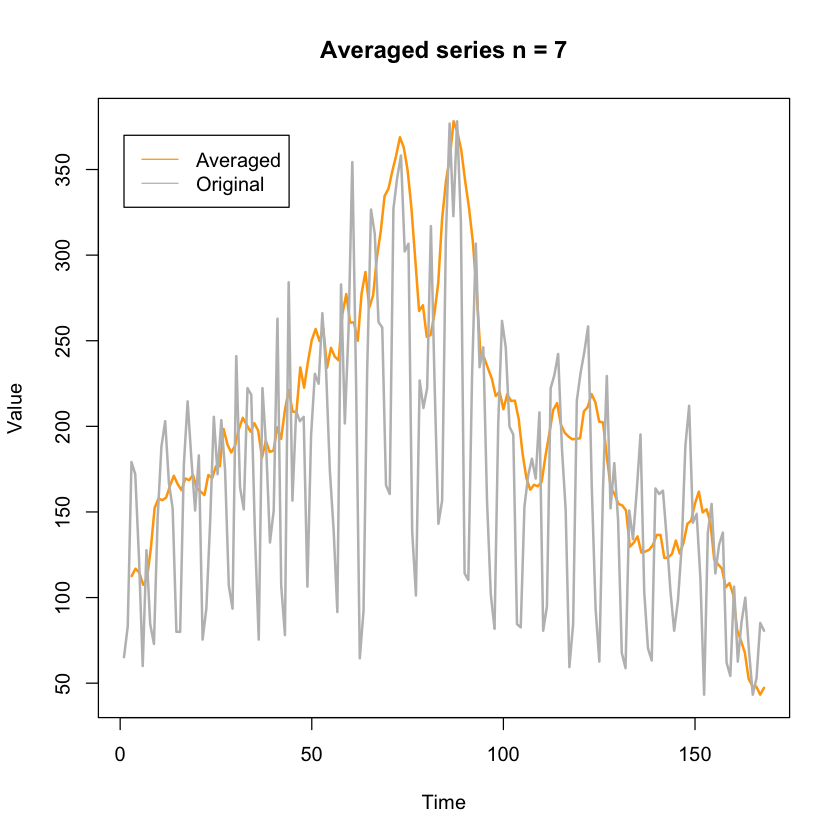

In [114]:
seriesSMA =  SMA(series, n = 7)
plot(seriesSMA[5:172], main="Averaged series n = 7", t="l", xlab="Time", ylab="Value", col="orange", lwd=2)
legend(1,370,c("Averaged","Original"), col=c("orange", "grey"), text.col = "black", lty=c(1, 1))
par(new=T)
plot(series, t="l", axes=F, ylab="", xlab="", col="grey", lwd="2")

We used above the sub-series [5:172] to accomodate for the NA’s in the average. The TTR library contains various other averaging commands (exponential moving average, zero lag exponential moving average and many more).

Another way of smoothing a series is by substracting elements a fixed distance away. The `diff` operation with lag $N$ is simply

$$
s_n = x_{n} - x_{n-N}
$$

The ***lag operator*** on a time series $x_t$ is defined as $Lx_t:= x_{t-1}$ and powers of it leads thus to the same difference operation $L^N x_t = x_{t-N}$ and $(1-L^N)x_t = x_t - x_{t-N}$. Since this operation appears often one usually defines $\Delta_N := 1 - L^N$. A general lag polynomial is simply a series

$$p(L) = \sum_{k=0}^\infty p_k L^k =  p_0 + p_1L + p_2 L^2+\dots$$

and we define a corresponding polynomial operator: 

$$p(L)x_t = p_0 x_t + p_1 x_{t-1} + p_2 x_{t-2}+\dots$$

Usually the polynomial is finite and if one sets $p(L)x_t = 0$ this describes a general difference equation. Difference equation are the simpler versions of auto-regressive processes (see below) in the sense that they do not include anything random.

When applied to our series we get

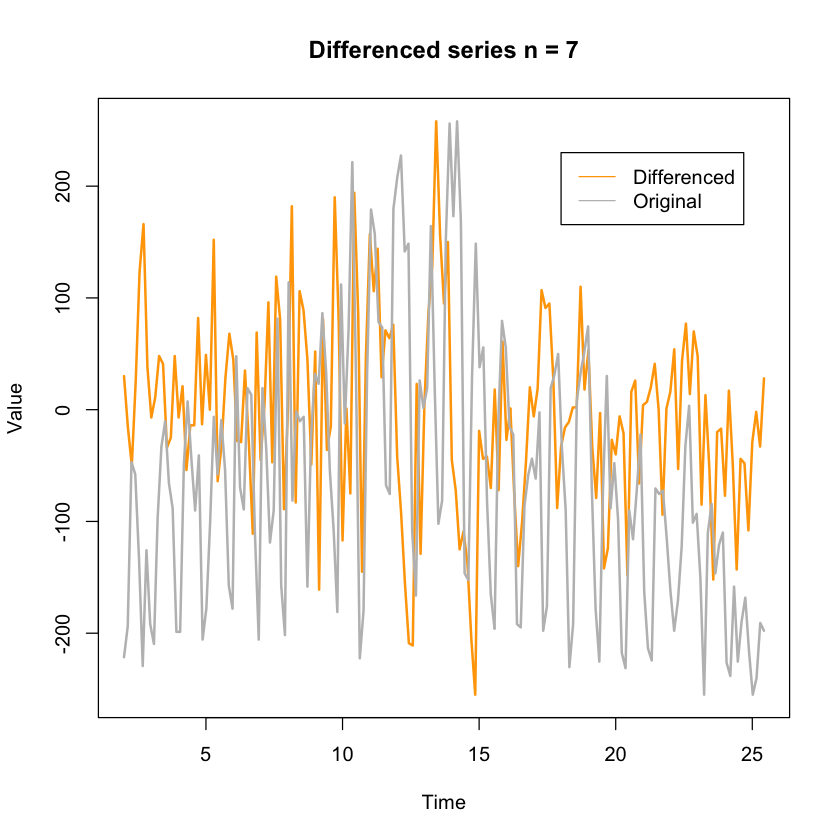

In [115]:
seriesDiff = diff(series, 7)
plot(seriesDiff, main="Differenced series n = 7", t="l", xlab="Time", ylab="Value", col="orange", lwd=2)
legend(18,230,c("Differenced","Original"), col=c("orange", "grey"), text.col = "black", lty=c(1, 1))
par(new=T)
plot(series, t="l", axes=F, ylab="", xlab="", col="grey", lwd="2")

Note that the lag operation turns our series into a series which fluctuates around zero. This is an indication that the underlying series is a so-called **stationary** series. A stationary series is one which keeps its characteristics if translated an arbitrary amount in time. That is, the overall characteristics of 

$$X = x_k, x_{k+1}, x_{k+2}, \ldots, x_{k+N}$$

is the same as by looking at 

$$L^{-\delta}X = x_{k+\delta}, x_{k+1+\delta}, x_{k+2+\delta}, \ldots, x_{k+N+\delta}$$

This immediately leads to the facts that for a stationary series the average of the lags is zero

$$\overline{s}=0.$$

This fact is often used to test whether a time series is stationary even though it's not bullet-proof.

Of course, beside these smoothing techniques you can use any mapping on a time series given in by the business context or domain expertise which help to extract insights more effectively. 

The concept of **correlation** in any series (not just time series) is the idea that values can be related to previous ones, that there is correlation between values within the series. Obviously, if one finds correlation in a series it helps to predict the next values. Classic series in mathematical analysis are correlated by definition. The Fibonacci series for instance

$$x_n = x_{n-1} + x_{n-2}$$

clearly defines the future values by means of past values has hence a strong (auto) correlation. The question is of course whether one can find out about this from the data without knowing anything else (i.e. how the data was created).

The technique to find out is based on the ***autocorrelation*** function. This is the linear dependence of a variable with itself at two points in time. More specifically, if $x_t$ is a time series with means $\mu_t,\,\mu_s$ at times $t,\,s$ then the auto-correlation function (ACF) is defined as
$$ACF(s,t) = \frac{\mathbb{E}[(x_s-\mu_s)(x_t-\mu_t)]}{\sigma_s \sigma_t}$$

For stationary processes $\mu := \mu_s =\mu_t $ and the autocorrelation between any two observations only depends on the time lag $h = \|t-s\|$ between them:

$$ACF(s,t) = \frac{\mathbb{E}[(x_0-\mu)(x_h-\mu)]}{\sigma^2}.$$

Let's take the first few items of the Fibonacci sequence and see what this gives:

In [117]:
fibo = c(1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597,2584,4181,6765,10946,17711,28657,46368,75025,121393,196418,317811,514229,832040)

The `acf` function creates a plot

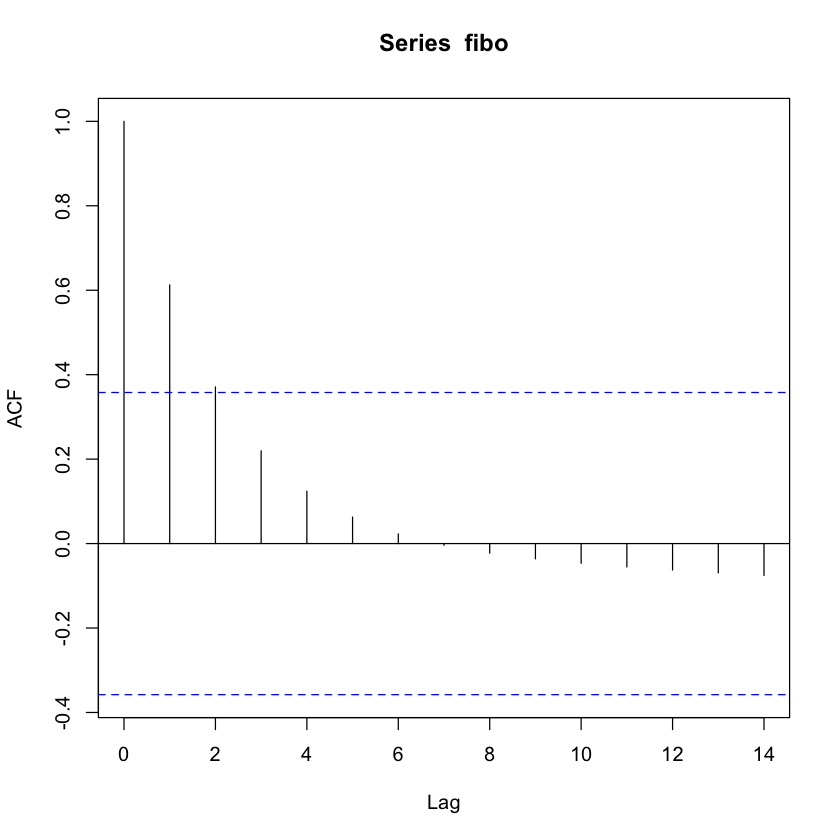

In [118]:
acf(fibo)

and what you need to see in this is first that the autocorrelation keeps going and in a way cumulates correlations. Second, that the blue dotted line gives a boundary inside which one can expect the correlation to be part of noise effects. In our case this means that lag 0,1,2 can be considered as resulting from correlations while all the other lags are due to noise. Obviously a term is always strongly correlated to itself and can alwasy be ignored. So, our ACF tells us that the Fibonacci numbers are related to the previous and previous-previous terms. It doesn't tell us how they are correlated, simply that one can expect a linear dependency. Non-linear dependencies in time series are a whole separate domain.

Correlation between two variables can result from a mutual linear dependence on other variables (confounding). Autocorrelation functions of stationary finite order autoregressive processes are always sequences that converge to zero but do not break off. This makes it difficult to distinguish between processes of different orders when using the autocorrelation function. To cope with this problem the ***partial autocorrelation function (PACF)*** is used. The partial correlation between two variables is the correlation that remains if the possible impact of all other random variables has been eliminated:

$$x_t = \phi_1 x_{t-1} + \phi_2 x_{t-2} +\dots+\phi_{t-k}+\eta_t$$

here the $\phi$'s are the PACF coefficients and $\eta$ is pure noise. The precise calculation of the coefficients is beyond the scope of this document, what matters is the conceptual point that the PACF can tell (suggest) you the order of an auto-regressive (AR) process. 

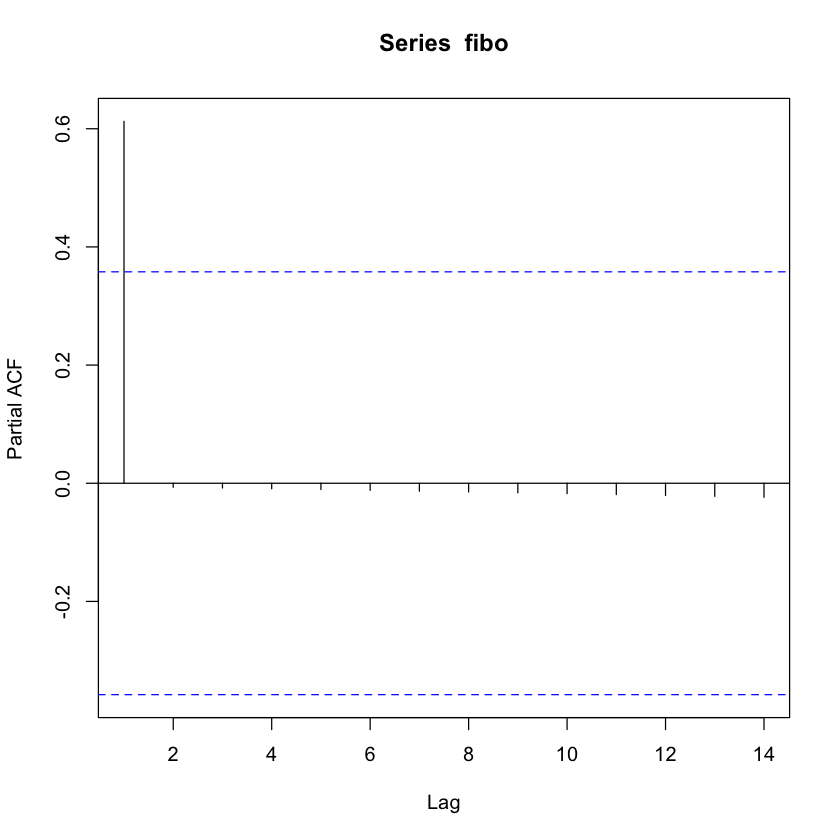

In [119]:
pacf(fibo)

Of course, the Fibonacci sequence is not noisy but **if** it would be modelled as a so-called AR process **then** the PACF tells us that it would best be modelled as

$$x_t = \phi_1 x_{t-1} +\eta_t$$

because of the spike at lag 1 in the PACF plot.

Another way of detecting correlation is by means of a **lag-plot** which indicates correlations if the points are somewhat aligned along the diagonal. That is, if point $x_t$ and $x_{t-1}$ are linearly related then the ratio $x_t/x{t-1}$ should be a constant (slope). We give an example of a lag-plot below.


Mathematical analysis deals with pure series in the sense that they are defined by strict relations and are hence always exactly predictable. Real-world series are usually noisy and one thus includes 'noise' as an integral ingredient in the mix resulting in difference equations with a noise terms. This leads to the following definition; the ***first-order auto-regressive process AR(1)*** is defined as

$$x_t = \delta + \alpha x_{t-1} + u_t$$

with $\alpha, \delta$ are constants and $u_t$ is stochastic noise.

Note that dropping this stochastic noise leads to a simple difference equation. With some coefficients being rededinfed one can cast the AR(1) process into

$$p(L)x_t = u_t$$

with a polynomial or order one. If this is not a first order polynomial one gets the genral ***AR(p) process***. The well-known random walk corresponds to the AR(1) process with $\delta = 0, \alpha = 1$. If you enumerate a few times the way that an AR(1) process depends on previous points you can easily see that at any point

$$ x_k = \alpha^k x_0 + \frac{1-\alpha^k}{1-\alpha}\delta + \sum_{j=0}^{k-1}\alpha^ju_{k-j}.$$

From this general representation one can see that if $k\rightarrow \infty$ and $\|\alpha\|<1$ then

$$ x_k \overset{k=\infty}{\rightarrow} \frac{1}{1-\alpha}\delta + \sum_{j=0}^{\infty}\alpha^ju_{k-j}.$$

and the long-term behavior is independent of the initial value $x_0$, it's a purely stochastic dependence. Note that in general the $\delta$ series $1+\alpha + \alpha^2 + \alpha^3\dots$ will not converge if $\alpha$ is not less than one. For this reason one always assumes that an AR(1) process has $\|\alpha\|<1$. If you try to define in R with a value one for instance you will get an error:
  
  
    bad_AR1_process = arima.sim(n=50, list(ar=c(1)) )
    Error in arima.sim(n = 50, list(ar = c(1))) : 'ar' part of model is not stationary

The `arima.sim` command creates examples of AR (and more general, see below) processes. You can specify the list of coefficients like so

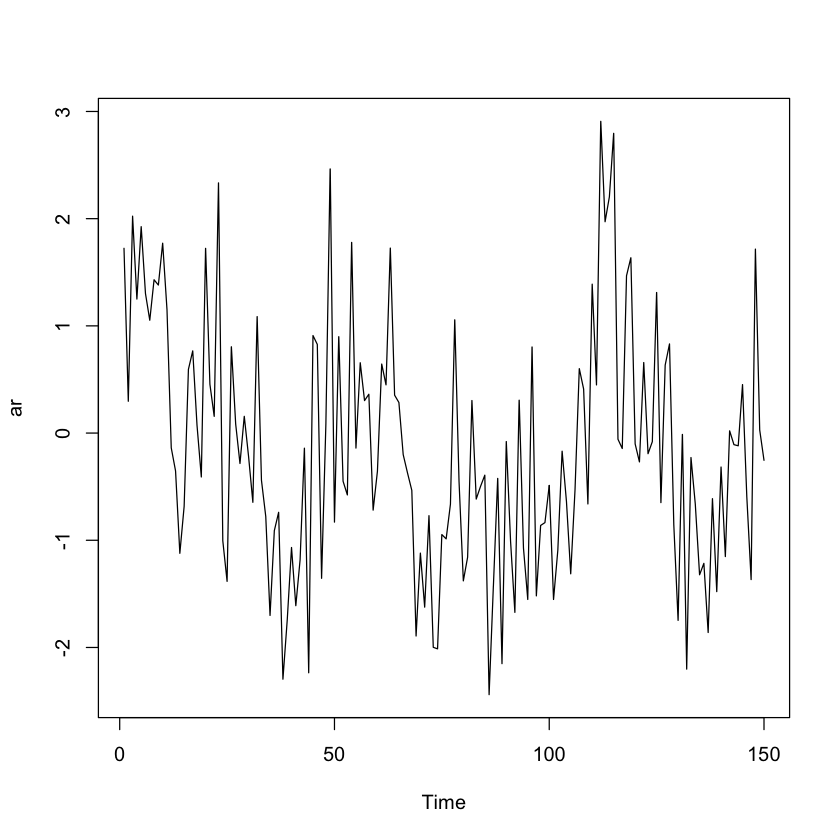

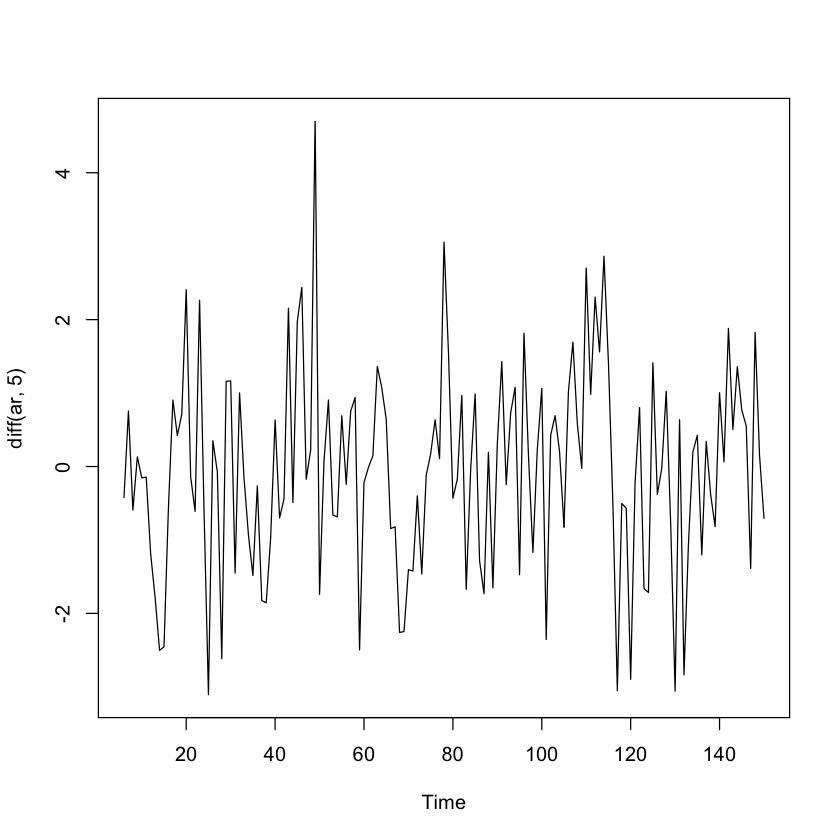

In [1]:
ar = arima.sim(n=150, list(ar=c(.3,.1,.5)))
plot(ar)
plot(diff(ar, 5))

The lag-plot of this process is

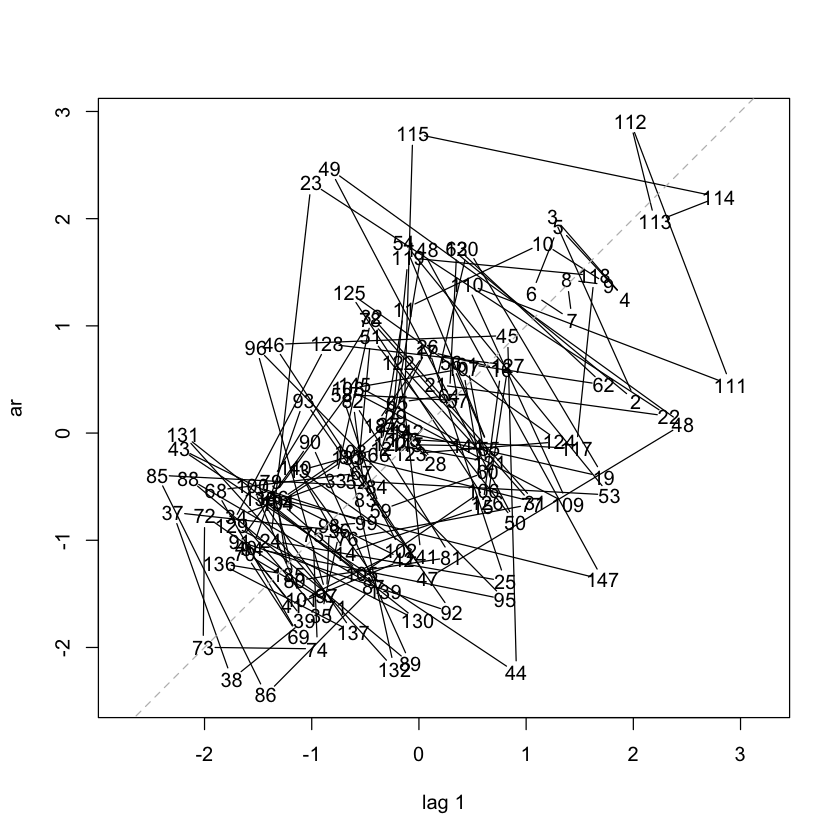

In [2]:
lag.plot(ar)

If you would defined an AR(1) process with higher (first) coefficient it would mean that the value is more strongly coupled to the immediate previous one and this can be seen in the lag-plot;

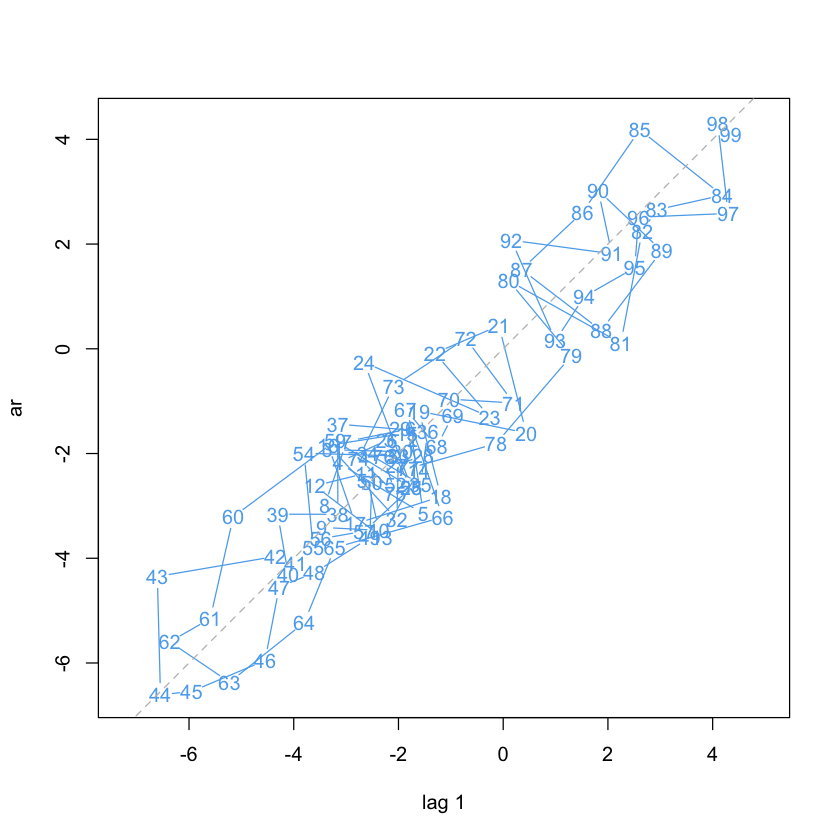

In [6]:
ar = arima.sim(n=100, list(ar=c(0.98)))
lag.plot(ar, col=rgb( 92/255, 172/255, 238/255))

An AR process is by definition stationary and the diff-plot also suggests it. Can one make this more precise? Yes, the thing to use here is the so-called **augmented Dickey-Fuller test** which in our case gives

In [127]:
tseries::adf.test(ar)


	Augmented Dickey-Fuller Test

data:  ar
Dickey-Fuller = -2.4661, Lag order = 5, p-value = 0.3822
alternative hypothesis: stationary


and with a p-value of less than 0.5 one has to rejected the null-hypothesis which in this case is that the series is non-stationary. Strictly speaking, the null is 'having a root of unity' which corresponds to a non-stationary series.

While the AR process correlates values with past values the **moving average MA process** correlates noise with past noise. The MA(1) process is defined as

$$x_t = \mu  +\eta_t + \theta_1 \eta_{t-1}$$

and more generically the MA(r) process is defined as 

$$x_t = \mu  +\eta_t + \theta_1 \eta_{t-1} + \ldots +\theta_r \eta_{t-r} $$

with $\mu$ the mean value of the series as can be easily seen since the mean value of the noise is zero.

Taken together, the AR and AM processes give

 $$x_t = \mu + \eta_t +  \sum_{i=1}^p \phi_i x_{t-i} + \sum_{i=1}^q \theta_i \eta_{t-i}$$
 
 and is called an **ARMA(p,q)** process. The $\mu$ term is related but not identical to the mean of the series. It's easy to see that the mean is equal to
 
 $$\overline{x} = \frac{\mu}{1- \Sigma_k \phi_k}$$
 
 which also says that if the $\phi$ coefficients nears one the ARMA process is ill defined.
 
 If one drops the constant then the definition is equivalent to the following 
 
 $$(1 - \sum_{i=1}^p \phi_i L^i) x_t = (1 - \sum_{i=1}^q \theta_i L^i) \eta_t. $$
 
 If the left-hand polynomial has a root of unity with multiplicity d then one can write
 
 $$(1 - \sum_{i=1}^p \phi_i L^i) = (1 - \sum_{i=1}^{p'} \phi_i L^i)(1-L)^d$$
 
 with $p = p' + d$. If that's the case then 
 
 $$(1 - \sum_{i=1}^p \phi_i L^i) \,(1-L)^d x_t = (1 - \sum_{i=1}^q \theta_i L^i) \eta_t $$
 
 is called an **ARIMA(p, d, q)** process (also knows as **Box-Jenkins process**) and one can also add the $\mu$ term again to include a non-zero mean. This is usually called **the drift** of the series.

Here is an interesting analogy when dealing with differencing (i.e. a d-parameter). The parameter $d=2$ in an ARIMA(1,2,0) process means

$$(1 - \phi_1 L) (1-L)^2 = \eta_t$$

and if you write out the differencing then you see that this amount to looking at the accelaration of the data much like one would look in mechanics at the _acceleration_ data rather than the position data;

$$a_t = (1-L)^2 x_t = (x_t - x_{t-1}) - (x_{t-1} - x_{t-2}) \sim \frac{d^2\, x(t)}{dt^2} = a(t)$$

and with this the ARIMA(1,2,0) is actually an AR(1) process of the acceleration

$$ (1-\phi L) a_t = \eta_t.$$

One can also represent ARIMA models like [Feynman diagrams](https://en.wikipedia.org/wiki/Feynman_diagram);

<img src="ARIMAFeynman.png"/>

which raises the question whether a tadpole diagram makes sense

<img src="ARIMATadpole.png"/>

but this would correspond to a model where

$$ x_t \sim \int \eta_t^2\,dt$$

and higer order giving loops on loops, which all is outside the linear domain of ARIMA models and leads to the so-called [GARCH or autoregressive conditional heteroskedasticity](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity) i.e. non-linear models of time series.

Besides SMA and lagging one can also smooth a series by means of **exponential smoothing** which attempts to correlate current values with past values with a damping factor. That is, the value at some point is related to all values in the past but with an exponential decrease. Technically this amounts to mapping the series $x_t$ to another series $s_t$ via

$$s_t = \alpha x_{t-1} + (1-\alpha) s_{t-1}$$

and the parameter $\alpha \in [0,1]$ puts less or more emphasis on the actual previous value. The name 'exponential' is related to the fact that if you write out a few terms you see that the past actual values are weighted with a geometric factor of $\alpha(1-\alpha)^k$.

One can see the effect of $\alpha$ by means of the `ses` command in the `forecast` package;



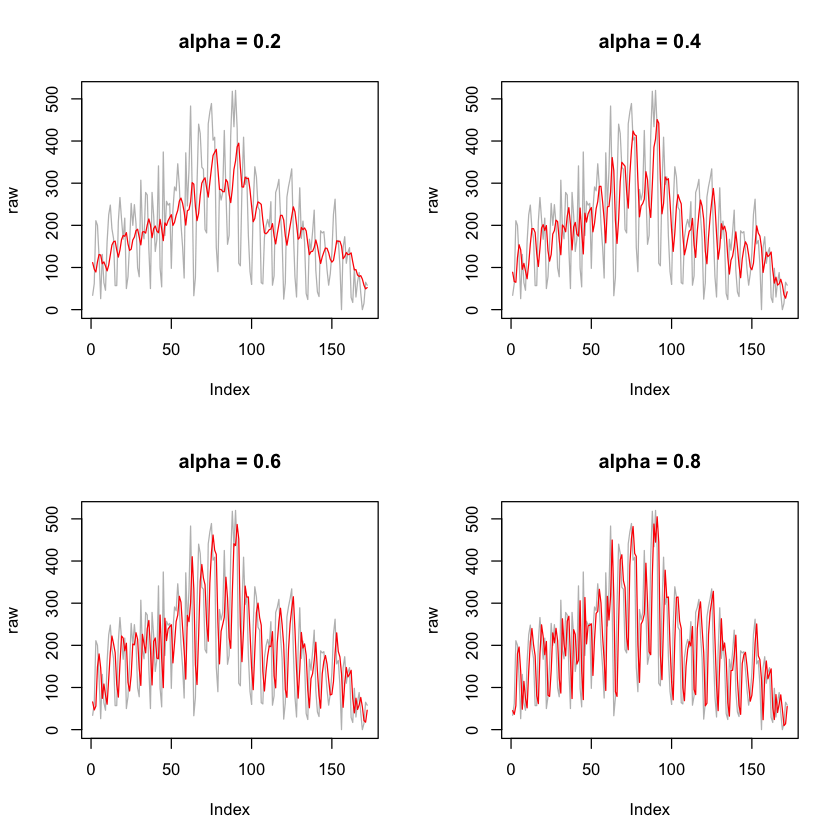

In [3]:
par(mfrow=c(2,2))
sm = forecast::ses(raw, exponential=T, alpha=0.2, beta=F, gamma=F)
plot(raw, t="l", col="grey", main="alpha = 0.2"); lines(sm$fitted, col="red")
sm = forecast::ses(raw, exponential=T, alpha=0.4, beta=F, gamma=F)
plot(raw, t="l", col="grey", main="alpha = 0.4"); lines(sm$fitted, col="red")
sm = forecast::ses(raw, exponential=T, alpha=0.6, beta=F, gamma=F)
plot(raw, t="l", col="grey", main="alpha = 0.6"); lines(sm$fitted, col="red")
sm = forecast::ses(raw, exponential=T, alpha=0.8, beta=F, gamma=F)
plot(raw, t="l", col="grey", main="alpha = 0.8"); lines(sm$fitted, col="red")

One can use the simple exponential smoothing for forecasting (and usually it's always considered in that context). The method can best be seen by looking at the equivalence of the ARIMA(0,1,1) process and simple exponential smoothing.

By definition the simple smoothing is

$$s_t = s_{t-1} + \alpha(x_{t-1} - s_{t-1})$$

and if you define $e_t = x_t - s_t$ then 

$$ x_{t-1} - x_t = (e_t - e_{t-1}) + (s_t - s_{t-1}) $$

and hence

$$(1-L) x_t = e_t + (1-\alpha) e_{t-1}$$

which corresponds as stated to an ARIMA(0,1,1) with $\theta = 1-\alpha$. Strictly speaking one needs to also demonstrate the fact that the $e_t$ has also a normal noise distribution $\sim N(0,\sigma^2)$. 

Now, the strength of the smoothing equation is that it does not contain the noise anymore so if $\alpha$ can be found then the recursion leads to a forecast. Because of the equivalence we can try to fit an ARIMA process and use the $\alpha$ value in the smoothing equation. 

Besides interesting examples of parametric time series, the ARIMA processes are a way to forecast series. If you can parametrize an ARIMA series based on the given data you can obviously continue the series based on the very definition of the ARIMA process. So, forecasting based on ARIMA amounts to finding the most appropriate parameters in the model.

How can this be done? What does it mean to have a good parametrization?




The following is a toolbox of quick results;

- the fastest way to estimate the ARIMA parameters of a series is by means of the `forecast::auto.arima` command which will give all the info you can wish for
- if the series is non-stationary you need differencing, ARMA models only deals with stationary data
- the first few peaks of the PACF give you the AR order
- the first few peaks of the ACF give you the MA order
- the so-called [Akaike Information Criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) is an indication of how well the parametrization works for the data, the lower the value the better it is. The coefficient is a measure of how much information is lost with the model and hence a lower value means less loss.
- the residuals (differences between model values and actual values) should not have any correlations and be pure noise. If not, it means that the model did not embrace fully all the correlations in the data. A good model should account for the information content in data and what remains should be in the hands of chance/noise.

Obviously, all of these tricks have deep roots and proofs but this goes beyond this text.

<div style="border-top: 2px solid black"></div>

# Example: using auto.arima

Let's take again the data used above and use `auto.arima` to fit and forecast it. 

In [1]:
raw = c(34, 62, 211, 200, 124, 26, 131, 64, 46, 161, 225, 248, 192, 169, 57, 57, 209, 266, 214, 167, 217, 50, 78, 155, 252, 200, 249, 204, 99, 78, 307, 188, 168, 278, 272, 144, 50, 278, 223, 138, 167, 341, 99, 54, 374, 176, 257, 248, 252, 98, 236, 291, 282, 346, 293, 203, 150, 75, 372, 246, 331, 483, 284, 33, 76, 297, 440, 418, 338, 333, 190, 182, 441, 469, 489, 402, 409, 148, 90, 285, 260, 278, 425, 280, 155, 176, 414, 518, 434, 520, 430, 110, 104, 289, 409, 297, 315, 175, 91, 60, 247, 339, 315, 243, 236, 64, 61, 171, 199, 214, 196, 256, 58, 80, 278, 290, 309, 224, 168, 25, 64, 267, 292, 311, 334, 186, 78, 30, 188, 289, 169, 210, 159, 38, 24, 167, 141, 185, 236, 93, 42, 31, 187, 182, 185, 142, 94, 58, 85, 134, 226, 262, 156, 164, 106, 0, 147, 173, 110, 136, 147, 29, 17, 98, 30, 66, 88, 39, 0, 15, 65, 58)
series = ts(raw, frequency = 7)

The suggestion from `auto.arima` is that the model is an ARIMA(1,1,1)(2,0,0)[7]. So, the original data is not stationary since $d=1$ is needed. In addition, the second series of numbers refer to a seasonal component in the data which can be modelled through an AR(2) process. 

In [5]:
library(forecast); ar = auto.arima(series); ar

Series: series 
ARIMA(1,1,1)(2,0,0)[7]                    

Coefficients:
         ar1      ma1    sar1    sar2
      0.3411  -0.9419  0.3904  0.3794
s.e.  0.0831   0.0319  0.0701  0.0697

sigma^2 estimated as 4547:  log likelihood=-965.8
AIC=1941.6   AICc=1941.97   BIC=1957.31

The AIC is here 1941.6 which does not say on its own a lot. If you wish to visually see how well the model fits the data you can use the `fitted` command like so

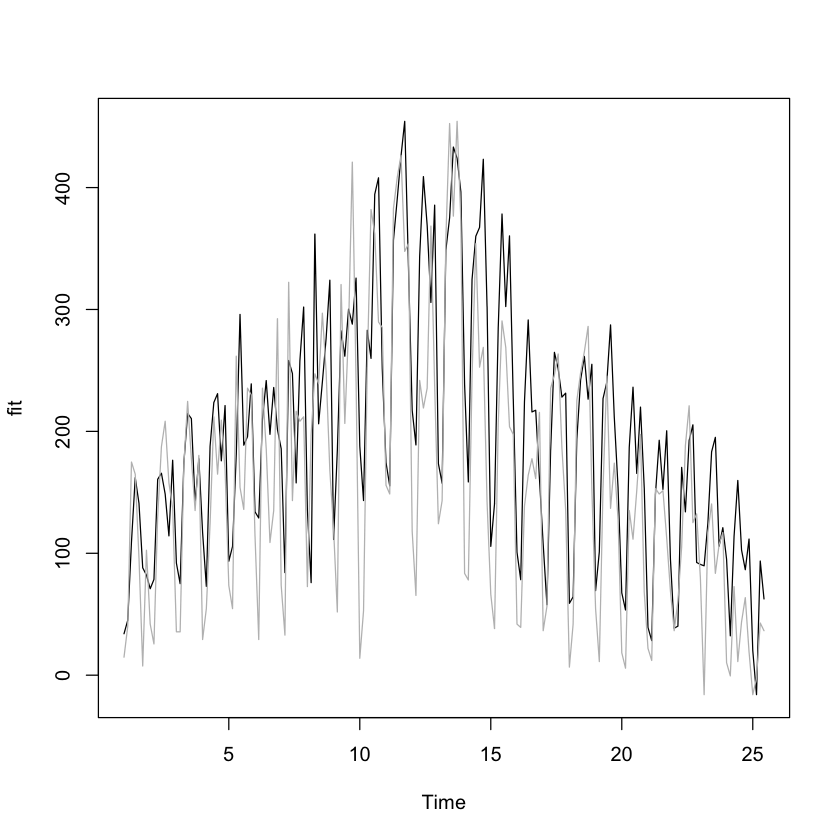

In [6]:
fit = fitted(ar)
plot(fit);par(new=T); plot(raw, col="grey", t="l", axes=F, ylab="", xlab="")

Finally, the `forecast` command tells you the (probabilistic) future. A forecast for time steps is

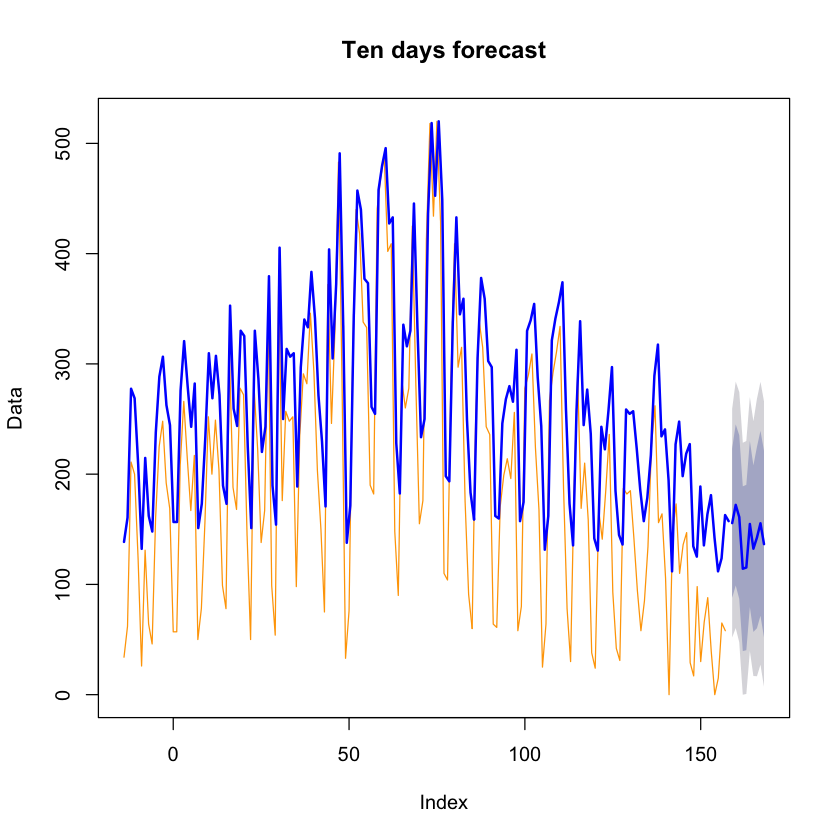

In [7]:
f = forecast(ar, h=10)
plot(-14:168, series[1:183], t="l",col="orange", main="Ten days forecast", ylab="Data", xlab="Index"); par(new=T); plot(f, axes=F, ylab="", xlab="", col="blue", lwd=2, main="")

<div style="border-top: 2px solid black"></div>

# Example: using simple exponential smoothing

Let's see how exponential smoothing does on the data above

In [9]:
raw = c(34, 62, 211, 200, 124, 26, 131, 64, 46, 161, 225, 248, 192, 169, 57, 57, 209, 266, 214, 167, 217, 50, 78, 155, 252, 200, 249, 204, 99, 78, 307, 188, 168, 278, 272, 144, 50, 278, 223, 138, 167, 341, 99, 54, 374, 176, 257, 248, 252, 98, 236, 291, 282, 346, 293, 203, 150, 75, 372, 246, 331, 483, 284, 33, 76, 297, 440, 418, 338, 333, 190, 182, 441, 469, 489, 402, 409, 148, 90, 285, 260, 278, 425, 280, 155, 176, 414, 518, 434, 520, 430, 110, 104, 289, 409, 297, 315, 175, 91, 60, 247, 339, 315, 243, 236, 64, 61, 171, 199, 214, 196, 256, 58, 80, 278, 290, 309, 224, 168, 25, 64, 267, 292, 311, 334, 186, 78, 30, 188, 289, 169, 210, 159, 38, 24, 167, 141, 185, 236, 93, 42, 31, 187, 182, 185, 142, 94, 58, 85, 134, 226, 262, 156, 164, 106, 0, 147, 173, 110, 136, 147, 29, 17, 98, 30, 66, 88, 39, 0, 15, 65, 58)
series = ts(raw, frequency = 7)

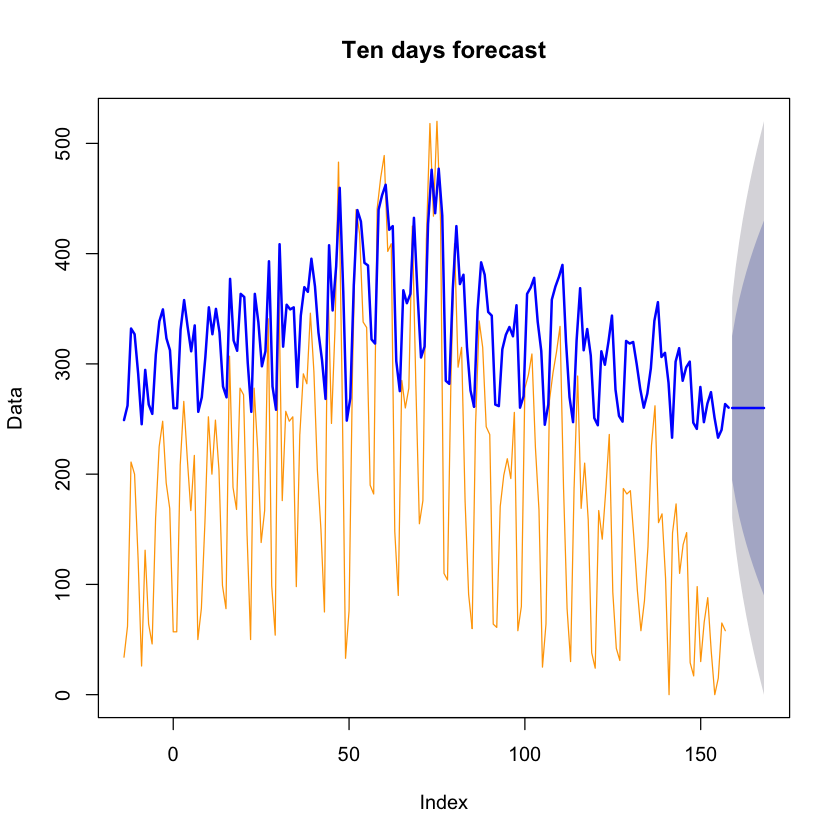

In [10]:
sm = forecast::ses(series, alpha=0.8)
f = forecast(sm, h=10)
plot(-14:168, series[1:183], t="l",col="orange", main="Ten days forecast", ylab="Data", xlab="Index"); par(new=T); plot(f, axes=F, ylab="", xlab="", col="blue", lwd=2, main="")

Just by looking at this plot it's clear that this approach to the data is not as effective as the ARIMA one. This can numerically be seen from the AIC which is much higher than the ARIMA one above (1941 vs. 2502).

In [17]:
AIC(sm$model)

[1] 2502.458

<div style="border-top: 2px solid black"></div>

# Example: parametrizing ARIMA

The `auto.arima` command contains a lot of high-tech and certainly does a good job to infer a model but if you wish to explore things yourself follow the recipe above. Let's take the (well-known tutorial) series describing the age of death of successive Kings of England

In [2]:
kings = c(60,43,67,50,56,42,50,65,68,43,65,34,47,34,49,41,13,35,53,56,16,43,69,59,48,59,86,55,68,51,33,49,67,77,81,67,71,81,68,70,77,56)

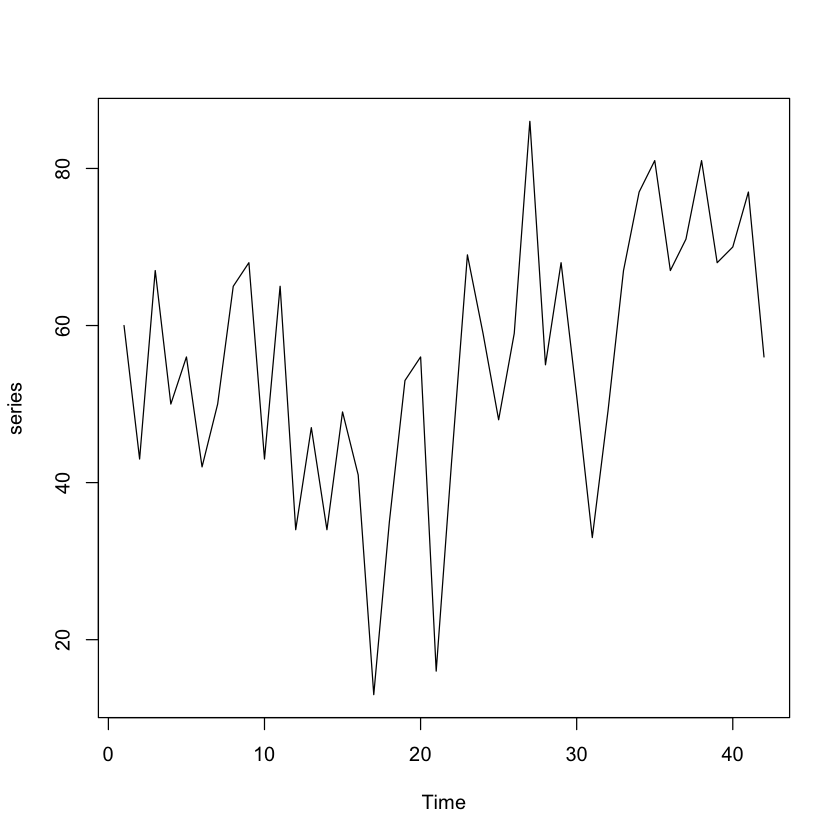

In [5]:
series = ts(kings);  plot(series)

Looking at the roots of unity we see that the p-value of 0.529 if above the threshold of 0.5 and we should accept the null-hypothesis that the series is not stationary. This can also be seen from the plot but the test is more solid. 

In [6]:
tseries::adf.test(series)


	Augmented Dickey-Fuller Test

data:  series
Dickey-Fuller = -2.1132, Lag order = 3, p-value = 0.529
alternative hypothesis: stationary


So, we need to take a difference in order to use arma (remember arma only deals with stationary series). Taking a diff of one leads indeed to a more stationary plot (which can also be confiromed via the Dickey-Fuller test);

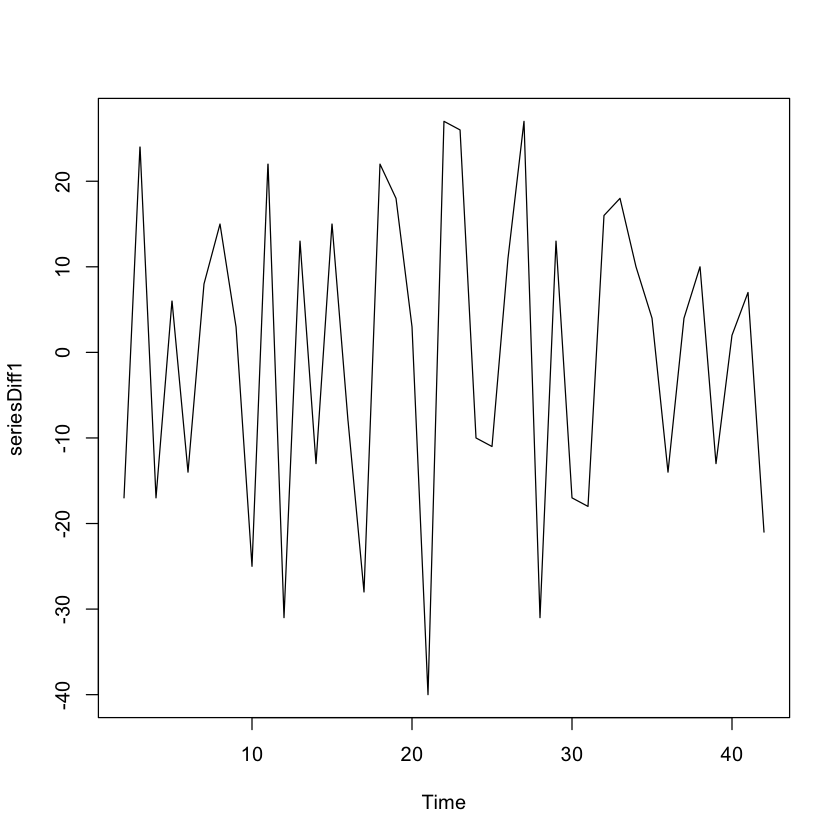

In [7]:
seriesDiff1 = diff(series,1); plot(seriesDiff1)

The fact that the diff=1 works means that we'll have an ARIMA(*,1,*) model. Looking at the ACF we see that lag=1 is outside the significance bounds and this means that ARIMA(0,1,1) could be a good model.


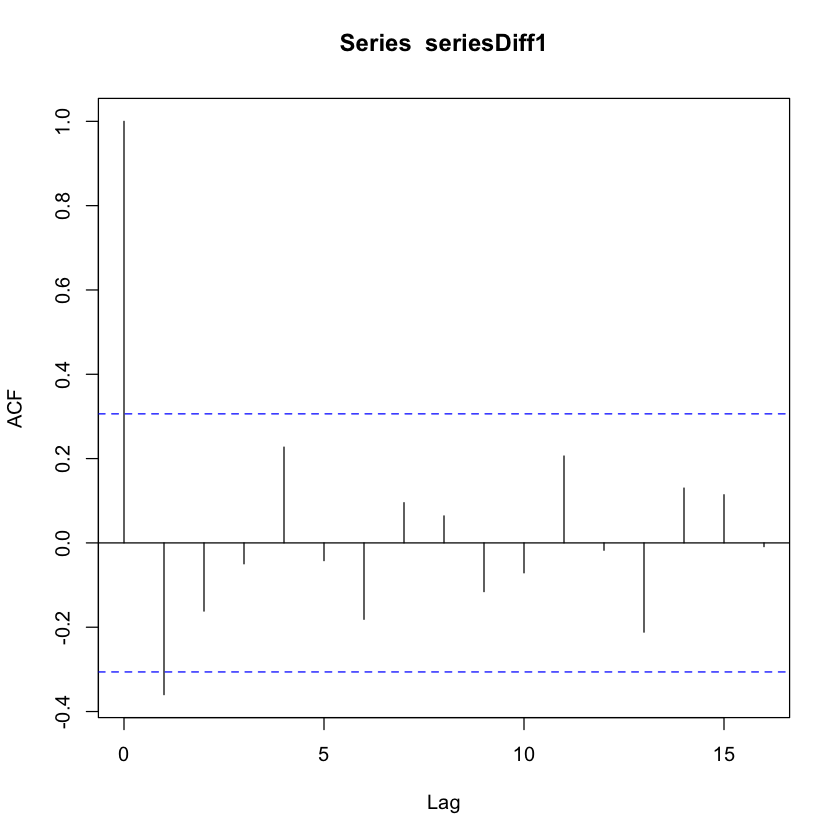

In [9]:
acf(seriesDiff1)

Looking at the PACF we see that lag=3 is outside the bounds and this suggests that ARIMA(3,1,0) could be a good model.

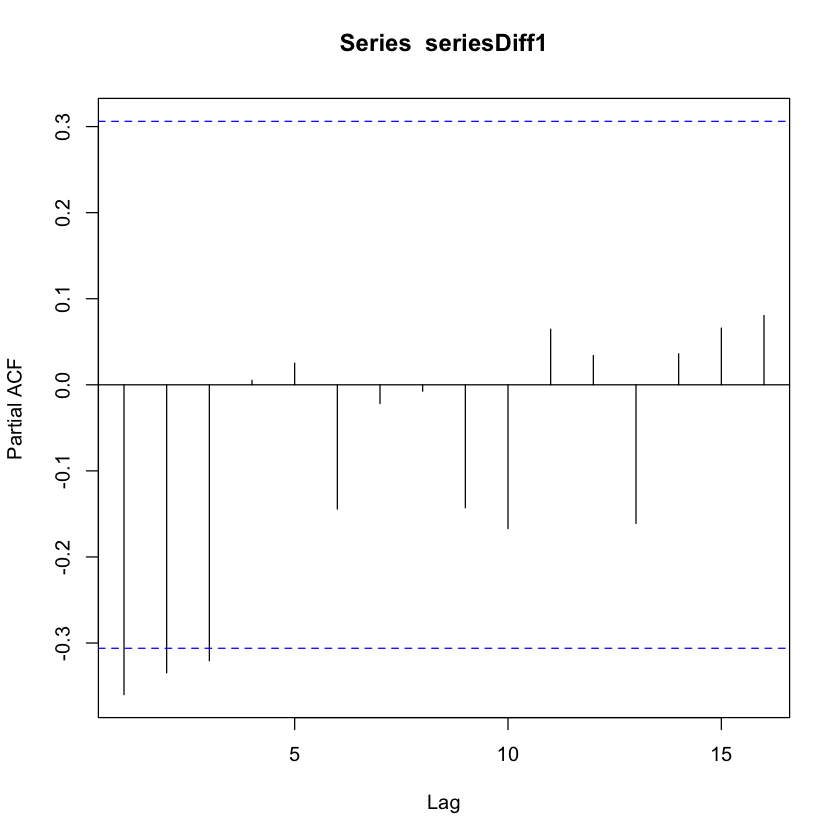

In [17]:
pacf(seriesDiff1)

A combination of both is also possible (i.e. ARIMA(3,1,1)) but one usually take the model with the least amount of parameters. This is the so-called **principle of parsimony**. In our case this would then lead to the ARIMA(0.1.1) model. If you try `auto.arima` this is also what is being suggested.

In [11]:
forecast::auto.arima(series)

Series: series 
ARIMA(0,1,1)                    

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 estimated as 230.4:  log likelihood=-170.06
AIC=344.13   AICc=344.44   BIC=347.56

So, let's define our model

In [22]:
seriesAr = arima(series, order=c(0,1,1))

and a fitted model to the data looks like the following;

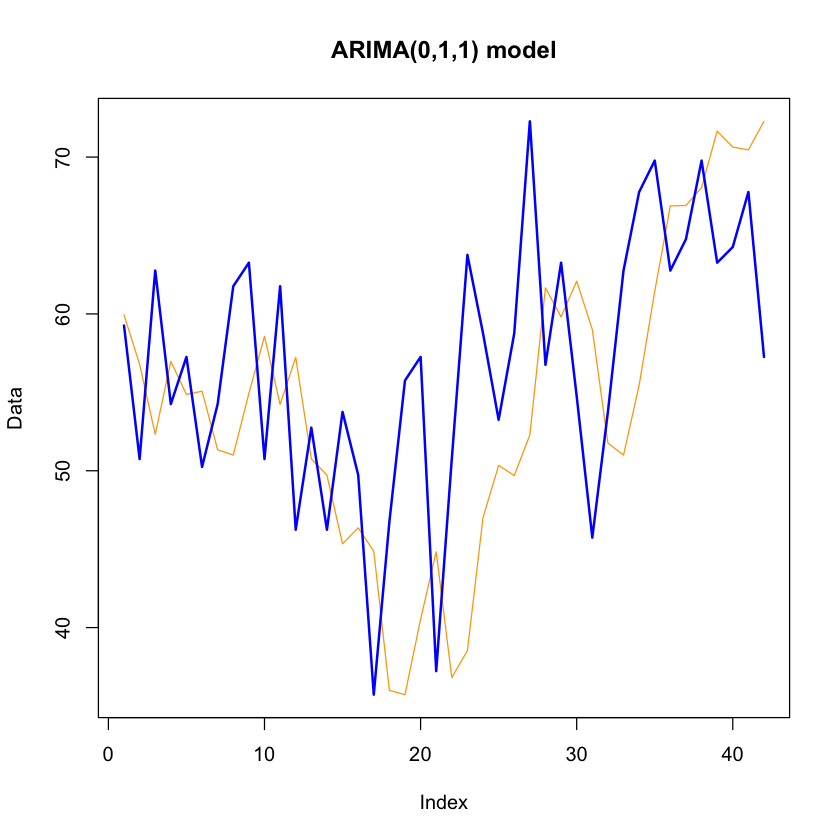

In [29]:
plot(fitted(seriesAr), t="l",col="orange", main="ARIMA(0,1,1) model", ylab="Data", xlab="Index"); par(new=T); plot(series, axes=F, ylab="", xlab="", col="blue", lwd=2, main="")

It might look like the fit is not very good but if you look at a QQ plot of the residuals you can see that it really is noise.

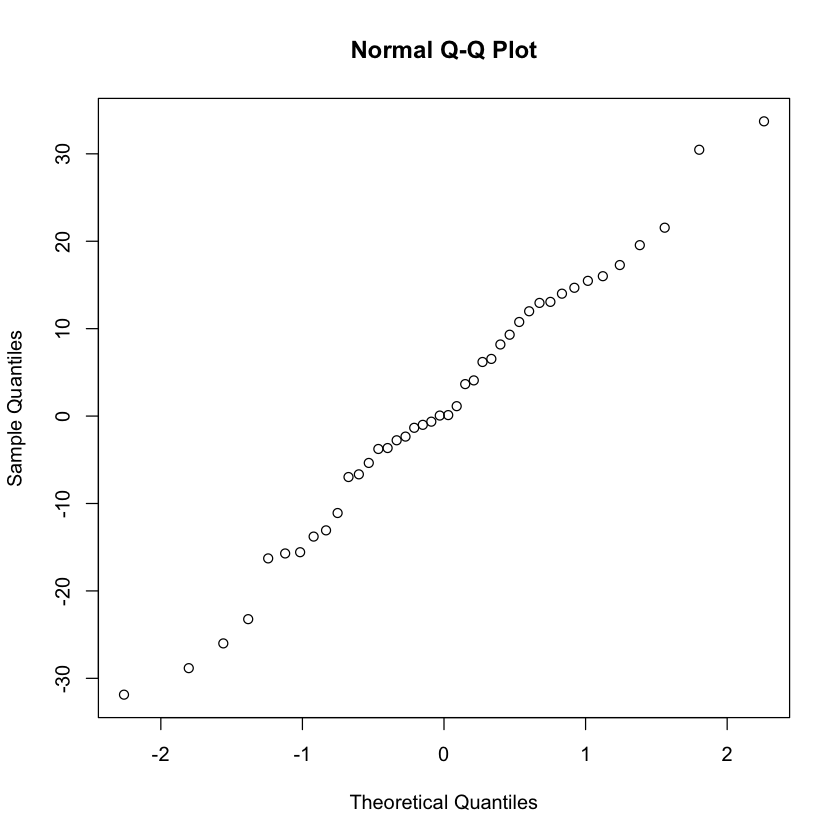

In [33]:
qqnorm(residuals(seriesAr))

You can, in addition, also look at the ACF of the residuals and confirm in this fashion that the residuals are not correlated.

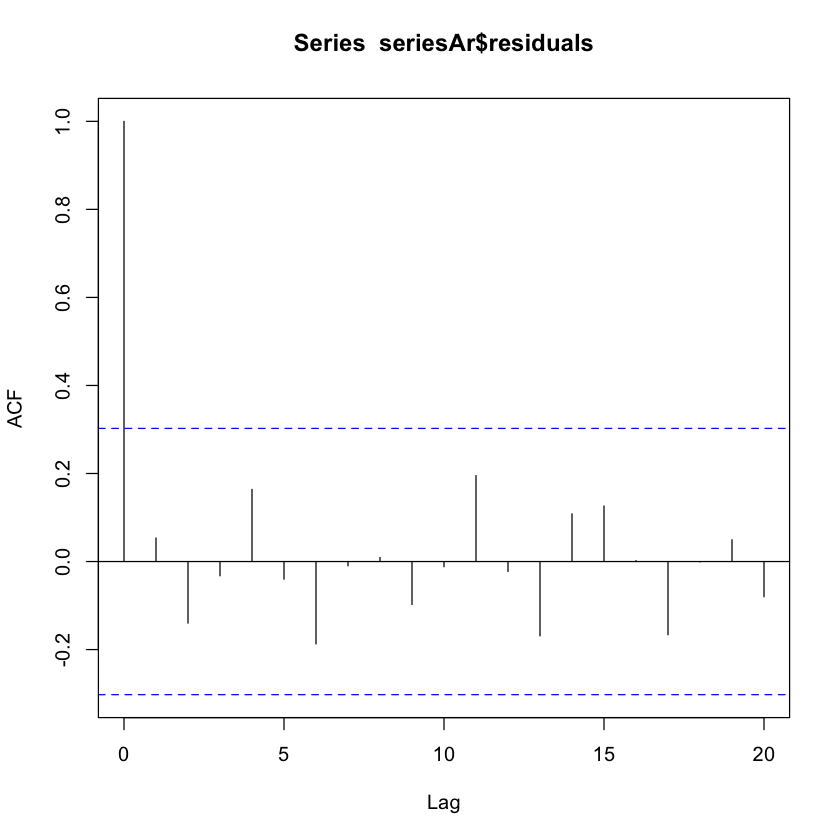

In [36]:
acf(seriesAr$residuals, lag.max=20)

And if you really want to go a steap further you can use the **Box–Pierce or Ljung–Box** which tests the null hypothesis that the data is independent;

In [37]:
Box.test(seriesAr$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  seriesAr$residuals
X-squared = 13.584, df = 20, p-value = 0.8509


and since the p-value is above 0.5 we can accept the null that the residuals are pure noise.
Moving on, now that we have a model we can forecast the series;

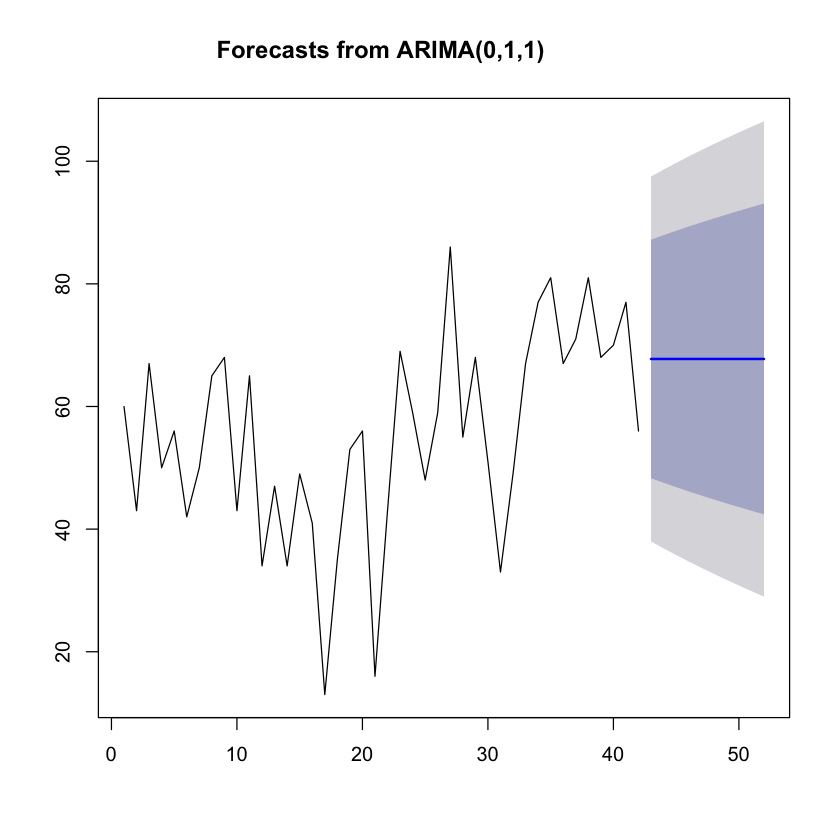

In [35]:
fo = forecast::forecast(seriesAr, h=10)
plot(fo)

You can check that if we had taken an ARIMA(3,1,1) model we would have had a slightly higher loss of information( 348 vs. 344);

In [41]:
seriesAr = arima(series, order=c(3,1,1)); AIC(seriesAr)

[1] 348.5879

<div style="border-top: 2px solid black"></div>

# Example: non-linear fitting

The following is an example of a series which cannot be casted into the ARIMA model and cannot be difference to any order into a stationary series. The reason being that the exponential on which it's based does not decrease by taking derivatives (which is proportional to the differencing).

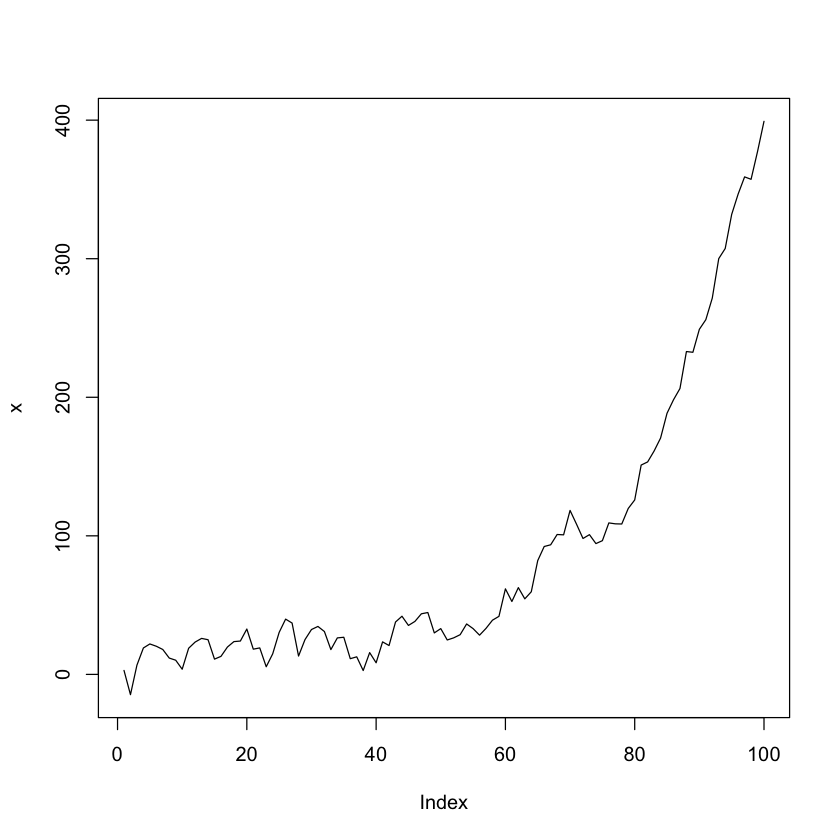

In [1]:
z <- rep(0, 100)
w <- rnorm(100, sd = 10)
for (t in 2:100) z[t] <- 0.7 * z[t - 1] + w[t]
Time <- 1:100
f <- function(x) exp(1 + 0.05 * x)
x <- f(Time) + z
plot(x, type = "l")

A plot of the second difference gives

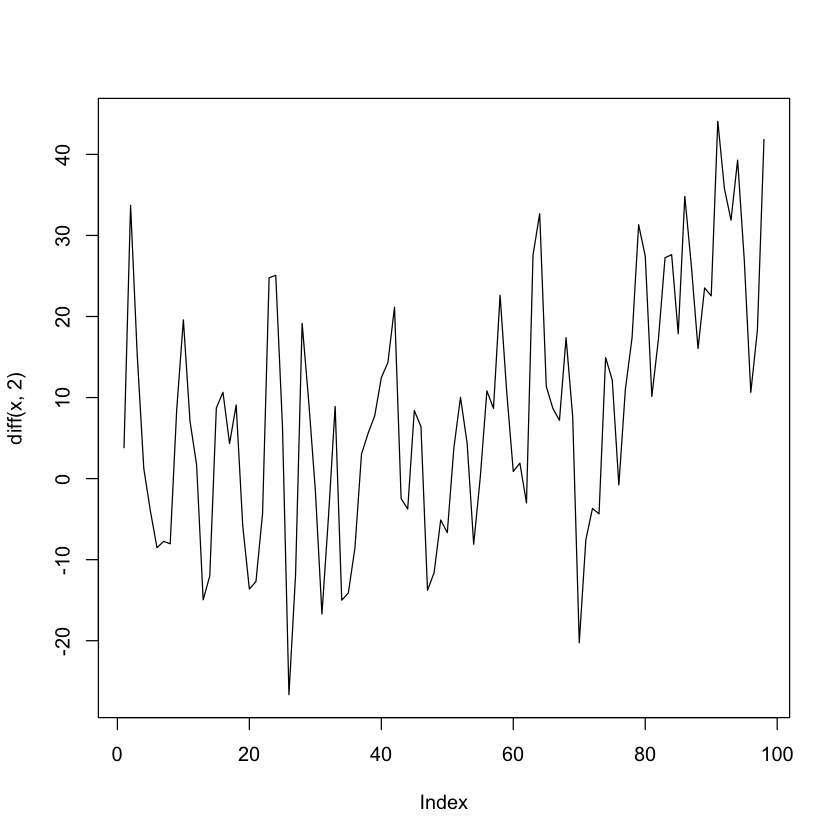

In [4]:
plot(diff(x,2),t="l")

There are various ways to deal with such data. One way is to 'guess' the shape of the underlying function and let the `nls` do the work of finding out which parameters fit best.

In [6]:
x.nls <- nls(x ~ exp(alpha0 + alpha1 * Time), start = list(alpha0 = 0.2, alpha1 = 0.4))

In [16]:
x.nls

Nonlinear regression model
  model: x ~ exp(alpha0 + alpha1 * Time)
   data: parent.frame()
 alpha0  alpha1 
1.01412 0.04986 
 residual sum-of-squares: 17997

Number of iterations to convergence: 40 
Achieved convergence tolerance: 3.755e-06

The values computed here are very close to the ones the series was based on and the information loss is

In [15]:
AIC(x.nls)

[1] 809.0663

<div style="border-top: 2px solid black"></div>

Let's take a closer look at the seasonal ARIMA models now, smetimes called SARIMA. The ARIMA(p,d,q) model corresponds to the equation

$$\phi(L)(1-L)^d\,x_t = \theta(L)\,\eta_t$$

where the $\phi, \theta$ are the AR and MA polynomials respectively. As a side-remark, one can also define the so-called **ARFIMA** models ([auto-regressive fractional integrated moving average](https://en.wikipedia.org/wiki/Autoregressive_fractionally_integrated_moving_average)) where the differencing is not a natural number anymore but a real number. 

The **SARIMA** model takes the seasonality into account by performing the same ARIMA-trick but on a larger scale;

$$\Phi_P(L^s)\phi_p(L)(1-L^s)^D(1-L)^d\,x_t = \Theta_Q(L^s)\theta_q(L)\,\eta_t$$

where the $s$ refers to the cycle and $\Phi, \Theta$ are polynomials in powers of $L^s$. This model gets the notation

$$(p,d,q)(P,D,Q)[s]$$

For example, the ARIMA(0, 0, 0)(1, 0, 0)[9] model corresponds to the equation

$$x_t = x_{t-9} + \eta_t$$

and looks like the following

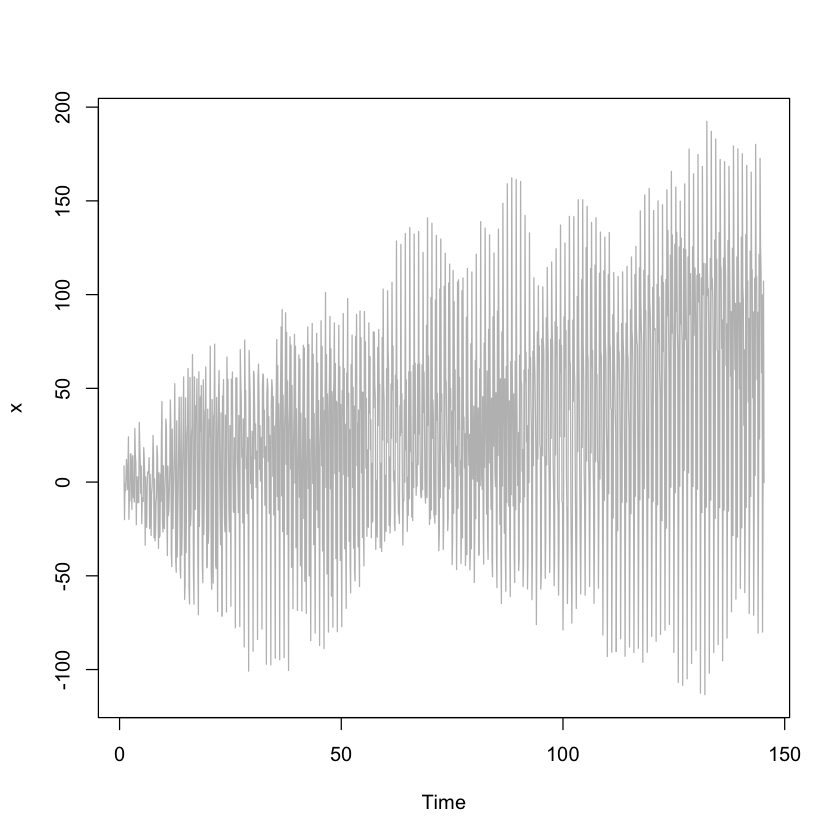

In [44]:
l <- 1300
x <- rep(0, l)
w <- rnorm(l, sd = 10)
for (t in 1:l) {
    if(t<10) x[t] = w[t]
    else x[t] <-  x[t - 9] + w[t]
}
x = ts(x, frequency = 9)        
plot(x, col="grey")

If you want to use the `arima` command here and parametrize the model you need things like so

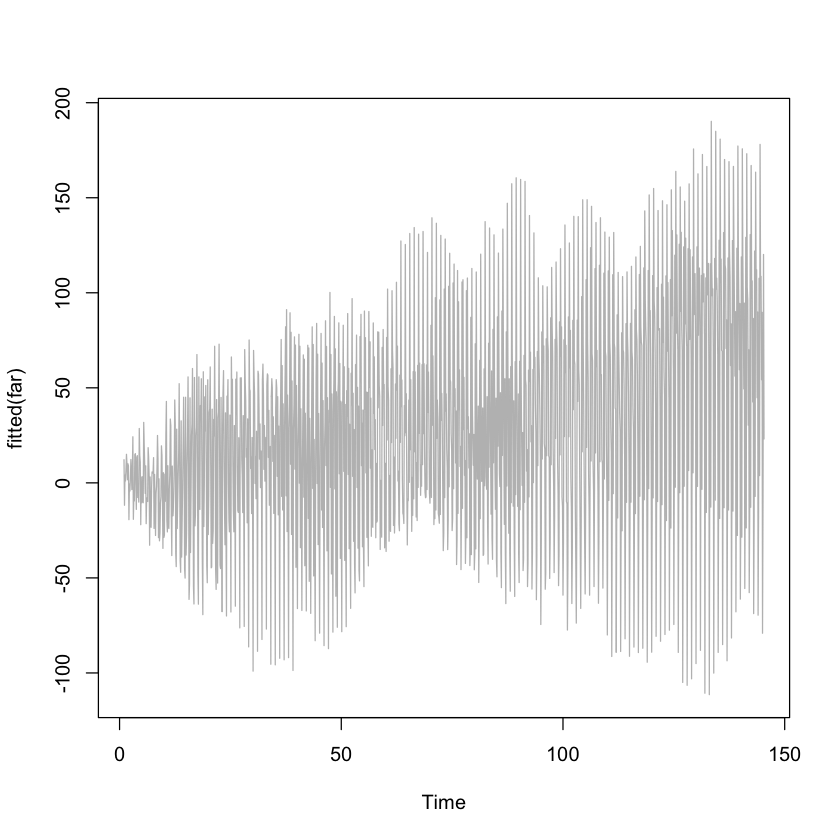

In [65]:
# this is a (0,0,0)(1,0,0)[9]simulation
#ar = arima.sim(model=list(order = c(0, 0, 0), seasonal = list(order = c(1, 0, 0), period = 9)), n=300 )
far = arima(x, order = c(0, 0, 0), seasonal = list(order = c(1, 0, 0), period = 9))                       

plot(fitted(far), col="grey")